## 3) Volatilidade e Risco

<img src='https://d1yhils6iwh5l5.cloudfront.net/charts/resized/81610/large/Monkey_Poo.png' width='400'>

<p align='center'>
"Volatilidade é risco, mas não é todo o risco" (escutei ou li em algum lugar)
</p>

<span style="color:#f7a6a6"> Volatilidade: É uma variável que mostra a intensidade e a frequência das oscilações nas cotações de um ativo financeiro </span>

Uma das mais tradicionais, e simplistas, formas de se representar o risco em finanças é pelo desvio padrão dos retornos, chamada também de _Close-to-close volatility_ ou _historical Volatility_:

$\sigma =  \sqrt{\frac{\sum{}^N_{i}(r_{i} - \bar{r})²}{N-1}} $

<span style="color:#f7a6a6"> Nada mais do que, a raiz da soma da distância entre os RETORNOS e a media deles ao quadrado, dividido pela quantidade de retornos - 1 (depende da fórmula usada) </span>


Anualizando a fórmula:

$\sigma_{a}=\sigma_{d} * \sqrt{252} $


Há alternativas para se mensurar a volatilidade, são elas
* _Desvio padrão móvel_ ou _Desvio padrão corrido_
* _Média Móvel Simples (Simple Moving Average - SMA)_
* _Média Móvel Poderada Exponêncial (Exponentially Weighted Moving Average - EWMA)_
* _Semi-desvio (Semi deviation)_: volatilidade de uma subamostra de retornos negativos
* Outras medidas mais complexas como:
    * Parkinson Volatility
    * Garman Klass Volatility
    * Rogers-Satchell Volatility
    * Yang Zhang Volatility

Outras fontes:

* https://www.ivolatility.com/help/6.html#sma
* https://portfolioslab.com/tools

#### __a)__ Calcule a volatilidade nas formas: histórica (retornos diários), histórica anualizada, desvio padrão móvel, SMA e EWMA; de uma ação de sua escolha (pode ser a mesma da questão anterior). Explique como esses índices explicam a volatilidade das ações.

<span style="color:#f7a6a6"> Explicação: </span>

SMA = Simple Moving Average nada mais é do que a média aritmética dos retornos de determinado intervalor de tempo

EWMA = Exponentially Weighted Moving Average ou médias móveis exponencialmente ponderadas, utiliza o método de suavização exponencial e considera os valores mais recentes da série de dados como mais significativos em função do futuro.

In [ ]:
# Coloquei a parte feita pelo outro grupo aqui, só para conseguir usar as variáveis dos exercícios que eles fizeram
# Parte do outro grupo
start_date = "2018-01-01"
end_date = "2022-12-31"

vale = yf.download('VALE3.SA', start=start_date, end=end_date)
vale['Retorno Diário'] = vale['Adj Close'].pct_change()

# volatilidade histórica
historical_volatility = vale['Retorno Diário'].std()

# anualizado
annualized_historical_volatility = historical_volatility * np.sqrt(252)

print(historical_volatility, annualized_historical_volatility)

vale['Desvio Padrão Móvel'] = vale['Retorno Diário'].rolling(window=22).std()

# SMA
vale['SMA'] = vale['Retorno Diário'].rolling(window=22).mean()

# EWMA
vale['EWMA'] = vale['Retorno Diário'].ewm(span=22, adjust=False).mean()

# Parte feita por mim
VaR_VALE3 = vale3[['Adj Close','Volume','Log Retorno']]
for i in range(len(VaR_VALE3)):

    VaR_VALE3['HV'] = VaR_VALE3["Log Retorno"].apply(lambda x : ((x ) ** 2))

VaR_VALE3


[*********************100%%**********************]  1 of 1 completed


0.025893309176495342 0.4110435402090801


,Adj Close,Volume,Log Retorno,HV
Date,,,,
2018-01-02,25.256786,14156500,-0.006010,0.000036
2018-01-03,25.105446,12744200,0.004091,0.000017
2018-01-04,25.208359,18433000,0.015489,0.000240
2018-01-05,25.601858,15251300,0.021984,0.000483
2018-01-08,26.170927,14542800,-0.003708,0.000014
...,...,...,...,...
2022-12-23,74.970680,18656500,0.009110,0.000083
2022-12-26,75.656807,18407500,0.023597,0.000557
2022-12-27,77.463333,26720300,-0.002245,0.000005


#### __Desafio__: escolha uma das formas mais "complexas" e calcule a volatilidade
dica: cole o link de uma imagem da fórmula aqui

#### __c)__ Faça um histograma da distribuição dos retornos, indicando a linha vertical que delimita o var VaR como

obs: também podemos fazer o grafíco contendo a distribuição das perdas (oposto do retorno), ou seja :

$L = - R$ 

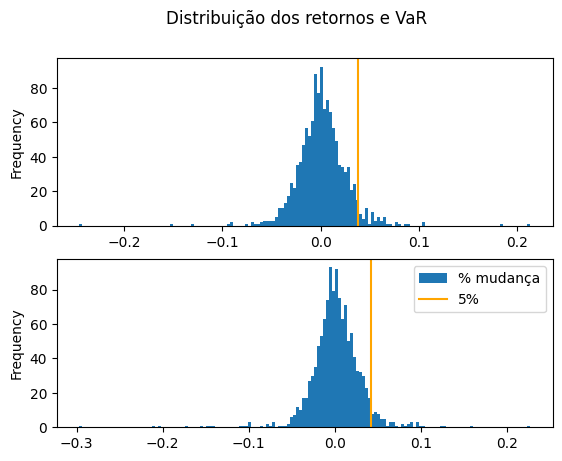

In [ ]:
fig, [ax1,ax2] = plt.subplots(2, 1, sharey = True)
fig.suptitle("Distribuição dos retornos e VaR")

ax1 = VaR_VALE3["% mudança"].plot(kind = 'hist', bins = 150, ax = ax1)
ax1.axvline(np.percentile(VaR_VALE3["% mudança"],95), color = 'orange', label = '5%')

ax2 = VaR_PETR4["% mudança"].plot(kind = 'hist', bins = 150, ax = ax2)
ax2.axvline(np.percentile(VaR_PETR4["% mudança"],95), color = 'orange', label = '5%')

plt.legend()
plt.show()

#### __d)__ Compute o o CVaR _histórico_ nos 5% piores casos, e reconstrua os dois gráficos anteriores com a linha vertical delimitando também o CVaR

<span style="color:#f7a6a6"> Explicação: </span>

CVAR ou Conditional VAR: É considerado uma melhoria do VAR. Sendo o VAR a chance de se perder, CVAR considera a chance de você perder acima de determinado valor.
https://analisemacro.com.br/mercado-financeiro/value-at-risk-e-conditionalvalue-at-risk-com-o-python/

[*********************100%%**********************]  1 of 1 completed


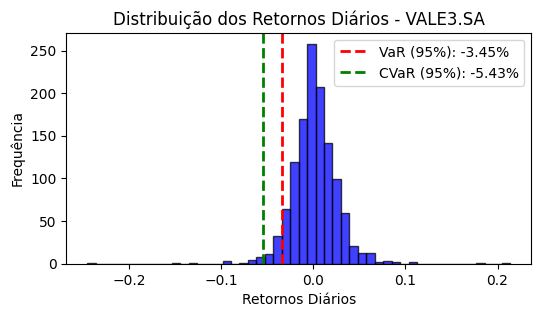

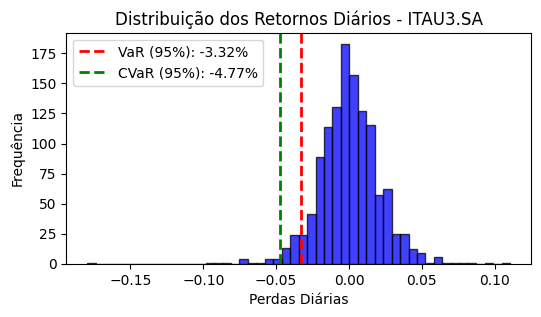

In [ ]:
itau = yf.download('ITUB4.SA', start=start_date, end=end_date)

itau['Daily Returns'] = itau['Adj Close'].pct_change()
vale['Daily Returns'] = vale['Adj Close'].pct_change()

confidence_level = 0.95

var_vale = np.percentile(vale['Daily Returns'].dropna(), (1 - confidence_level) * 100)
var_itau = np.percentile(itau['Daily Returns'].dropna(), (1 - confidence_level) * 100)

cvar_vale = vale['Daily Returns'][vale['Daily Returns'] <= var_vale].mean()
cvar_itau = itau['Daily Returns'][itau['Daily Returns'] <= var_itau].mean()



# Figura 1
plt.figure(figsize=(6, 3))

plt.hist(vale['Daily Returns'].dropna(), bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(var_vale, color='red', linestyle='dashed', linewidth=2, label=f'VaR (95%): {var_vale:.2%}')
plt.axvline(cvar_vale, color='green', linestyle='dashed', linewidth=2, label=f'CVaR (95%): {cvar_vale:.2%}')
plt.xlabel('Retornos Diários')
plt.ylabel('Frequência')
plt.title('Distribuição dos Retornos Diários - VALE3.SA')
plt.legend()

# Figura 2
plt.figure(figsize=(6, 3))
plt.hist(itau['Daily Returns'].dropna(), bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(var_itau, color='red', linestyle='dashed', linewidth=2, label=f'VaR (95%): {var_itau:.2%}')
plt.axvline(cvar_itau, color='green', linestyle='dashed', linewidth=2, label=f'CVaR (95%): {cvar_itau:.2%}')
plt.xlabel('Perdas Diárias')
plt.ylabel('Frequência')
plt.title('Distribuição dos Retornos Diários - ITAU3.SA')
plt.legend()

plt.show()

### VaR Paramétrico e não Paramétrico

* "VaR Paramétrico baseia-se no conhecimento prévio de uma distribuição estatística (Ex.: Curva Normal) para fazer o cálculo das perdas financeiras com base em hipótese de comportamento da distribuição de probabilidades dos retornos dos ativos. "

* "O VaR Não Paramétrico não faz hipótese alguma sobre a distribuição de probabilidade dos retornos dos ativos. Nestas técnicas (Ex.: Simulação Histórica, Simulação de Monte Carlo) são utilizadas a história dos próprios retornos para obtenção de informações sobre as perdas financeiras"

fonte :
[Value at Risk - wikipedia (link)](https://pt.wikipedia.org/wiki/Value_at_Risk)

Repare até agora você só calculou medidas paramétricas, já que não fora exigido que se modelasse a série de perdas (assumindo uma distribuição específica). **Pense**: quais são as diferenças nos resultados, testes de hipóteses, inferências e eficiência dos dois modelos?

#### __e)__ Realize as versões paramétricas para o VaR e o CVaR, assumindo uma distribuição normal.

#### <span style="color:#f7a6a6"> Para Var paramétrico: </span>

https://medium.com/@feadev/var-da-estat%C3%ADstica-ao-mercado-financeiro-33043b349488

Basta usar a função norm.ppf

#### <span style="color:#f7a6a6"> Para Cvar paramétrico: </span>

<img src ='https://miro.medium.com/v2/resize:fit:1400/1*AYFuG9v77zw7E7GADon3yQ.png' width = "20%">

* o que está dentro do parentêses é o norm.ppf ( é a função de densidade da distribuição normal padrão avaliada em zα. Ela representa a probabilidade de observar o valor em uma distribuição normal padrão.)
* o mi (μ) normalmente é menos
* confidence value é dado por 1 - nivel de confiança

#### <span style="color:#f7a6a6"> Lembrando: </span>

PDF é uma função que descreve a probabilidade relativa de uma variável aleatória contínua assumir um determinado valor.

A PDF não fornece diretamente a probabilidade de a variável aleatória ter um valor específico, mas sim a probabilidade de a variável assumir um valor dentro de um intervalo específico.

Um exemplo comum de PDF é a distribuição normal

Dica:
```{python} 
from scipy.stats import norm 
```

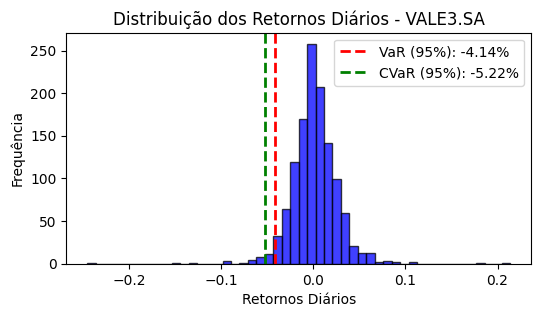

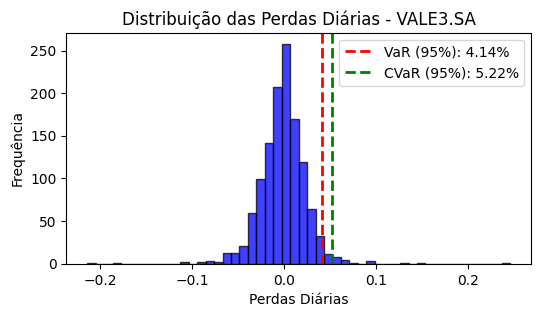

In [ ]:
vale['Retornos'] = vale['Adj Close'].pct_change().dropna()

vale['Perdas'] = -vale['Retornos']

mean_return = vale['Retornos'].mean()
std_return = vale['Retornos'].std()

confidence_level = 0.95

VaR = norm.ppf(1 - confidence_level, mean_return, std_return)

CVaR = mean_return - std_return * norm.pdf(norm.ppf(1 - confidence_level)) / (1 - confidence_level)

VaR_loss = -VaR
CVaR_loss = -CVaR

# Figura 1
plt.figure(figsize=(6,3))

plt.hist(vale['Retornos'].dropna(), bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR, color='red', linestyle='dashed', linewidth=2, label=f'VaR (95%): {VaR:.2%}')
plt.axvline(CVaR, color='green', linestyle='dashed', linewidth=2, label=f'CVaR (95%): {CVaR:.2%}')
plt.xlabel('Retornos Diários')
plt.ylabel('Frequência')
plt.title('Distribuição dos Retornos Diários - VALE3.SA')
plt.legend()

# Figura 2
plt.figure(figsize=(6, 3))

plt.hist(vale['Perdas'].dropna(), bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_loss, color='red', linestyle='dashed', linewidth=2, label=f'VaR (95%): {VaR_loss:.2%}')
plt.axvline(CVaR_loss, color='green', linestyle='dashed', linewidth=2, label=f'CVaR (95%): {CVaR_loss:.2%}')
plt.xlabel('Perdas Diárias')
plt.ylabel('Frequência')
plt.title('Distribuição das Perdas Diárias - VALE3.SA')
plt.legend()

plt.show()

In [ ]:
# calculando a volatilidade de Garman-Klass (GK)

high_vale = vale['High']
low_vale = vale['Low']
open_vale = vale['Open']
close_vale = vale['Close']

gk_vale = np.sqrt(
    sum(((np.log(high_vale/low_vale))**2)/(2*252))
    - sum((np.log(close_vale/open_vale)**2) * (2*np.log(2)-1) /252 )
)

print(str(gk_vale*100) + str('%'))

4.1652327265328415%


### Value at Risk (VaR)

Uma das formas mais conhecidas para medir o risco de perda é a ferramente chamada de Value at Risk (VaR). Há diversos tipos de VaR, mas seu princípio é representar, em um número, o risco de um produto financeiro ou de uma carteira relacionado a sua __perda potencial máxima__ para um __dado horizonte__ e com um __intervalo de confiança__ (normalmente 95%, 97,5%, 99%, 99.9%), ou seja, é o risco de enventos extremos na distribuição de perdas (retornos negativos).

### CVaR:

O *Cumulated Value at Risk* é uma variação do VaR, porém ele procura mensurar a perda esperada nos piores 1-x% cenários. Em outras palavras, um CVaR(95), por exemplo, busca responder o quanto excederiam as perdas __em média__ nos 5% piores casos. 

Estatísticamente, ele é a esperança matemática da cauda da distribuição de perdas

$CVaR(\alpha) := \frac{1}{1-\alpha} \mathbb{E} \int_{VaR(\alpha)}^{\bar{x}} xf(x)dx$

sendo: 

* $f(.)$ : função densidade de probabilidade (probability density function - pdf)
* $\bar{x}$: limite superior (pode ser infinito)
* $VaR(\alpha)$ : VaR em um intervalo de confiança de $\alpha$


<img src ='https://www.researchgate.net/publication/321925061/figure/fig1/AS:573442517934080@1513730758570/represents-the-CVaR-in-terms-of-costs.png'>


#### __b)__ Calcule o VaR _histórico_ (não é necessário modelar os retornos como uma distribuição normal) para a VALE3 e mais _uma_ das 3 ações usadas na etapa anterior. Considere o intervalo de confiança de 95%.

<span style="color:#f7a6a6"> Explicação: </span>

VAR: Considera os valores passados, e mostra a probabilidade de estar entre os 5% de queda de retorno; quanto mais próximo de 0, mais próximo do centro

In [ ]:
VaR_VALE3["% mudança"] = VaR_VALE3["Adj Close"].pct_change()
VaR_VALE3 = VaR_VALE3.dropna()
VaR_95_VALE = VaR_VALE3["% mudança"].quantile(0.05)

VaR_PETR4 = acoes_petroliferas[["Adj Close"]]
VaR_PETR4["% mudança"] = VaR_PETR4["Adj Close"].pct_change()
VaR_PETR4 = VaR_PETR4.dropna()
VaR_95_PETR = VaR_PETR4["% mudança"].quantile(0.05)

pd.Series({"VALE3" :VaR_95_VALE,"PETR4" :VaR_95_PETR})

VALE3   -0.034459
PETR4   -0.037555
dtype: float64

#### __Desafio__: escolha uma das formas mais "complexas" e calcule a volatilidade
dica: cole o link de uma imagem da fórmula aqui

In [ ]:
# calculando a volatilidade de Garman-Klass (GK)

high_vale = vale['High']
low_vale = vale['Low']
open_vale = vale['Open']
close_vale = vale['Close']

gk_vale = np.sqrt(
    sum(((np.log(high_vale/low_vale))**2)/(2*252))
    - sum((np.log(close_vale/open_vale)**2) * (2*np.log(2)-1) /252 )
)

print(str(gk_vale*100) + str('%'))

4.1652327265328415%
